In [8]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler, LabelEncoder
path = "Journals/Journals/*.xlsx"
#New
data_list = []
file_list = []
all_files = glob.glob(path)

for file in all_files:
    excel_file = pd.ExcelFile(file)
    sheet_names = excel_file.sheet_names
    for i in range(len(sheet_names)):
        
        data = pd.read_excel(file, sheet_name=sheet_names[i],  engine='xlrd')
        #print(data.iloc[:, 0])
        #if("Project/ Course" in data.columns.tolist()):
            #print(file)
        data_list.append(data)
        name = file.split("\\")[1].split(".")[0]
        #print(name + " " + sheet_names[i])
        file_list.append(file + " " + sheet_names[i])

for df in data_list:
    df.fillna(0, inplace=True)
        
print("Imported")


XLRDError: Excel xlsx file; not supported

In [253]:
#GOAL: Find out why there is overlap

#Get list of all topics (habits & time based stuff)
topicsSet = set()
habitsList = []
timeList = []
uniqueList = []
counter = 0
for i in range(len(data_list)):
    d = data_list[i]
    topicsSet.update(d.columns.tolist())
    average_values = d.mean()
    max_values = d.max()
    #print(average_values)
    #ISSUE - storing index label when changing.
    product = 0
    for index_label, value in max_values.iloc[1:].items():
        if(value <= 1):
            #DROP ZONE
            if(index_label == 'Less than 3.5+ on phone'):
                d.drop('Less than 3.5+ on phone', axis=1, inplace=True)
            if(index_label == 'Less than 4+ on phone'):
                d.drop('Less than 4+ on phone', axis=1, inplace=True)
            if(index_label == 'Wash Face'):
                d.drop('Wash Face', axis=1, inplace=True)
            if(index_label == 'Shoulder exercise'):
                d.drop('Shoulder exercise', axis=1, inplace=True)
            if(index_label == 'Less than 8hr sleep'):
                d.drop('Less than 8hr sleep', axis=1, inplace=True)
            if(index_label == 'More than 8.5hr sleep'):
                d.drop('More than 8.5hr sleep', axis=1, inplace=True)
            if(index_label == 'More than 8hr sleep'):
                d.drop('More than 8hr sleep', axis=1, inplace=True)
            if(index_label == 'Not stay in bed'):
                d.drop('Not stay in bed', axis=1, inplace=True)
            if(index_label == 'Other'):
                d.drop('Other', axis=1, inplace=True)
            #Rename Zone
            if(index_label == 'Build'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Build"]
                    d.drop('Build', axis=1, inplace=True)
                else:  
                    d.rename(columns={"Build": "Productivity"}, inplace=True)
            if(index_label == 'Cardio'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Cardio"]
                    d.drop('Cardio', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Cardio": "Exercise"}, inplace=True)
            if(index_label == 'Company'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Company"]
                    d.drop('Company', axis=1, inplace=True)
                else:  
                    d.rename(columns={"Company": "Productivity"}, inplace=True)
            if(index_label == 'Company '): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Company "]
                    d.drop('Company ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Company ": "Productivity"}, inplace=True)
            if(index_label == 'Course'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Course"]
                    d.drop('Course', axis=1, inplace=True)
                else:
                    d.rename(columns={"Course": "Productivity"}, inplace=True)
            if(index_label == 'Course / Project'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Course / Project"]
                    d.drop('Course / Project', axis=1, inplace=True)
                else:
                    d.rename(columns={"Course / Project": "Productivity"}, inplace=True)
            if(index_label == 'Design Team'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Design Team"]
                    d.drop('Design Team', axis=1, inplace=True)
                else:
                    d.rename(columns={"Design Team": "Productivity"}, inplace=True)
            if(index_label == 'Design Team / Project / Course'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Design Team / Project / Course"]
                    d.drop('Design Team / Project / Course', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Design Team / Project / Course": "Productivity"}, inplace=True)
            if(index_label == 'Desing Team'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Desing Team"]
                    d.drop('Desing Team', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Desing Team": "Productivity"}, inplace=True)
            if(index_label == 'Draw'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Draw"]
                    d.drop('Draw', axis=1, inplace=True)
                else:
                    d.rename(columns={"Draw": "Solitude"}, inplace=True)
            if(index_label == 'Duo lingo'): 
                d.rename(columns={"Duo lingo": "Duolingo"}, inplace=True)
            if(index_label == 'Hardware'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Hardware"]
                    d.drop('Hardware', axis=1, inplace=True)
                else:
                    d.rename(columns={"Hardware": "Productivity"}, inplace=True)
            if(index_label == 'Jounral '): 
                d.rename(columns={"Jounral ": "Journal"}, inplace=True)
            if(index_label == 'Jounral'): 
                d.rename(columns={"Jounral": "Journal"}, inplace=True)
            if(index_label == 'Journal '): 
                d.rename(columns={"Journal ": "Journal"}, inplace=True)
            if(index_label == 'Meditate'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditate"]
                    d.drop('Meditate', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditate": "Solitude"}, inplace=True)
            if(index_label == 'Meditation'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditation"]
                    d.drop('Meditation', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditation": "Solitude"}, inplace=True)
            if(index_label == 'Meditate / Walk'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditate / Walk"]
                    d.drop('Meditate / Walk', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditate / Walk": "Solitude"}, inplace=True)
            if(index_label == 'Meditation / Art / Work'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditation / Art / Work"]
                    d.drop('Meditation / Art / Work', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditation / Art / Work": "Solitude"}, inplace=True)
            if(index_label == 'Not Jerk'): 
                d.rename(columns={"Not Jerk":"Bad Habit"}, inplace=True)
            if(index_label == 'Not Jerkoff'): 
                d.rename(columns={"Not Jerkoff":"Bad Habit"}, inplace=True)   
            if(index_label == 'Other Activity'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Other Activity"]
                    d.drop('Other Activity', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Other Activity":"Exercise"}, inplace=True)
            if(index_label == 'Other Productivity'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Other Productivity"]
                    d.drop('Other Productivity', axis=1, inplace=True)
                else:
                    d.rename(columns={"Other Productivity":"Productivity"}, inplace=True)
            if(index_label == 'Photo'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo"]
                    d.drop('Photo', axis=1, inplace=True)
                else:
                    d.rename(columns={"Photo":"Media"}, inplace=True)
            if(index_label == 'Photo / Read / draw'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo / Read / draw"]
                    d.drop('Photo / Read / draw', axis=1, inplace=True)
                else:
                    d.rename(columns={"Photo / Read / draw":"Media"}, inplace=True)
            if(index_label == 'Photo / Video'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo / Video"]
                    d.drop('Photo / Video', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Photo / Video":"Media"}, inplace=True)
            # if(index_label == 'Productivity (hrs)'):
            #     if('Productivity' in d.columns):
            #         d["Productivity"] = d["Productivity"] + d["Productivity (hrs)"]
            #         d.drop('Productivity (hrs)', axis=1, inplace=True)
            #     else:
            #         d.rename(columns={"Productivity (hrs)":"Productivity"}, inplace=True)
            if(index_label == 'Productivtity '):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Productivtity "]
                    d.drop('Productivtity ', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Productivtity ":"Productivity"}, inplace=True)
            if(index_label == 'Project'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project"]
                    d.drop('Project', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project":"Productivity"}, inplace=True)
            if(index_label == 'Project '):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project "]
                    d.drop('Project ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project ":"Productivity"}, inplace=True)
            if(index_label == 'Project / Course'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project / Course"]
                    d.drop('Project / Course', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project / Course":"Productivity"}, inplace=True)
            if(index_label == 'Read'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read"]
                    d.drop('Read', axis=1, inplace=True)
                else:
                    d.rename(columns={"Read":"Solitude"}, inplace=True)
            if(index_label == 'Read / Meditate'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read / Meditate"]
                    d.drop('Read / Meditate', axis=1, inplace=True)
                else:
                    d.rename(columns={"Read / Meditate":"Solitude"}, inplace=True)
            if(index_label == 'Read / Meditate / Draw'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read / Meditate / Draw"]
                    d.drop('Read / Meditate / Draw', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Read / Meditate / Draw":"Solitude"}, inplace=True)
            if(index_label == 'Skate'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Skate"]
                    d.drop('Skate', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Skate":"Exercise"}, inplace=True)
            if(index_label == 'Skate '):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Skate "]
                    d.drop('Skate ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Skate ":"Exercise"}, inplace=True)
            if(index_label == 'Software'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Software"]
                    d.drop('Software', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Software":"Productivity"}, inplace=True)
            if(index_label == 'Video'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Video"]
                    d.drop('Video', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Video":"Media"}, inplace=True)
            if(index_label == 'Walk'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Walk"]
                    d.drop('Walk', axis=1, inplace=True)
                else:
                    d.rename(columns={"Walk":"Solitude"}, inplace=True)
            if(index_label == 'Walk '): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Walk "]
                    d.drop('Walk ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Walk ":"Solitude"}, inplace=True)
            if(index_label == 'Wokrout'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Wokrout"]
                    d.drop('Wokrout', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Wokrout":"Exercise"}, inplace=True)
            if(index_label == 'Workot'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workot"]
                    d.drop('Workot', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Workot":"Exercise"}, inplace=True)
            if(index_label == 'Workout'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workout"]
                    d.drop('Workout', axis=1, inplace=True)
                else:
                    d.rename(columns={"Workout":"Exercise"}, inplace=True)
            if(index_label == 'Workout '):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workout "]
                    d.drop('Workout ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Workout ":"Exercise"}, inplace=True)
        else: 
            if(index_label == 'Exercise'): 
                d.rename(columns={"Exercise": "Exercise (hrs)"}, inplace=True)
                data_list[i] = d
            if(index_label == 'Other Productivity'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Other Productivity"]
                    d.drop('Other Productivity', axis=1, inplace=True)
                else:
                    d.rename(columns={"Other Productivity": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Sleep'): 
                d.rename(columns={"Sleep": "Sleep (hrs)"}, inplace=True)
            if(index_label == 'School'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["School"]
                    d.drop('School', axis=1, inplace=True)
                else: 
                    d.rename(columns={"School": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Activity'): 
                d.rename(columns={"Activity": "Exercise (hrs)"}, inplace=True)
            if(index_label == 'Work'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Work"]
                    d.drop('Work', axis=1, inplace=True)
                else:
                    d.rename(columns={"Work": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Study'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Study"]
                    d.drop('Study', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Study": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Course / Project / Art'): 
                d.rename(columns={"Course / Project / Art": "Other (hrs)"}, inplace=True)
            if(index_label == 'Exercise/ Outoors/ Social'): 
                d.rename(columns={"Exercise/ Outoors/ Social": "Other (hrs)"}, inplace=True)
            if(index_label == 'Social'): 
                d.rename(columns={"Social": "Other (hrs)"}, inplace=True)
        

for i in range(len(data_list)):
    d = data_list[i]
    myList = set()
    for index_label in d.columns.tolist():
        if( d[index_label].ndim > 1):
            print(file_list[i] + " " + index_label)
            d[index_label] = d.groupby(level=0, axis=1).sum()
            d = d.loc[:, ~d.columns.duplicated()]
        if(not(index_label in myList)):
            myList.add(index_label)
        else:
            print(file_list[i] + " " + index_label)
            print(d)
        if(not(index_label in uniqueList)):
                uniqueList.append(index_label)     
#print(habitsList)
union_set = set(habitsList) & set(timeList)

# RESUTLTS
#print(union_set)

FINAL_HABIT_LIST = ['Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Productivity', 'Media', 'Duolingo', 'Productivity']
FINAL_TIME_LIST  = ['Exercise (hrs)', 'Mood', 'Other (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Sleep (hrs)']
FINAL_LIST = FINAL_HABIT_LIST + FINAL_TIME_LIST

#topicsList = list(topicsSet)
#topicsList.sort()
timeList.sort()
print(uniqueList)

#topicsList = list(topicsSet)
#topicsList.sort()

['Unnamed: 0', 'Mood', 'Sleep (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Productivity', 'Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Other (hrs)', 'Exercise (hrs)', 'Media', 'Duolingo']


In [254]:
def add_missing_columns(dataframes, all_columns):
    for df in dataframes:
        missing_columns = set(all_columns) - set(df.columns)
        for col in missing_columns:
            df[col] = 0
        
        for col in all_columns:
            existence_column_name = f"{col}_Exists"
            # If the column was originally in the DataFrame, mark as 1, else 0
            df[existence_column_name] = 1 if col in df.columns else 0
    return dataframes

data_list = add_missing_columns(data_list, FINAL_LIST)


In [255]:
all_columns = data_list[0].columns.tolist()
data_list = [df.sort_values(by=all_columns) for df in data_list]

# for df in data_list:
#      missing_columns = set(FINAL_LIST) - set(df.columns)
#      if(missing_columns):
#          print(missing_columns)
#          print("ERROR")

stacked_df = pd.concat(data_list)
stacked_df = stacked_df.drop(columns =['Unnamed: 0'])

['Mood', 'Sleep (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Productivity', 'Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Other (hrs)', 'Duolingo', 'Exercise (hrs)', 'Media', 'Solitude_Exists', 'Exercise_Exists', 'Leetcode_Exists', 'Journal_Exists', 'Profile Pic_Exists', 'Bad Habit_Exists', 'Productivity_Exists', 'Media_Exists', 'Duolingo_Exists', 'Exercise (hrs)_Exists', 'Mood_Exists', 'Other (hrs)_Exists', 'Phone Usage (hrs)_Exists', 'Productivity (hrs)_Exists', 'Sleep (hrs)_Exists']
Training dataset shape: (948, 30)
Test dataset shape: (237, 30)
R-squared: 0.3656954686878052
Mean Squared Error: 2.43242123486424
7.33191781630091


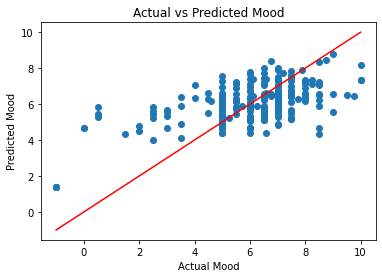

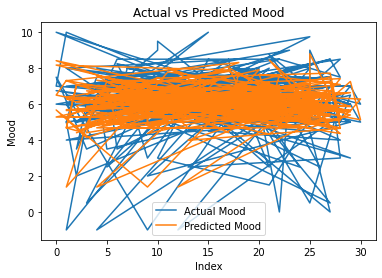

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import mode

train_df, test_df = train_test_split(stacked_df, test_size=0.2, random_state=42)

print(train_df.columns.tolist())
# Print the shapes of the training and test datasets
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Separate the features and target variables
y_train = train_df['Mood']
X_train = train_df.drop(columns=['Mood'])

y_test = test_df['Mood']
X_test = test_df.drop(columns=['Mood'])

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt

#print(len(y_pred))
""""
# Plot the distribution of y_test
plt.hist(y_test, bins=10, alpha=0.5, label='y_test')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Distribution of y_test')
plt.legend()
plt.show()

# Plot the distribution of y_train
plt.hist(y_train, bins=10, alpha=0.5, label='y_train')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Distribution of y_train')
plt.legend()
plt.show()

"""
print(y_pred[50])

# Scatter plot
plt.scatter(y_test, y_pred)
# plot line between actual and predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

plt.xlabel('Actual Mood')
plt.ylabel('Predicted Mood')
plt.title('Actual vs Predicted Mood')
plt.show()

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# Set y to be the 'Mood' column
y = stacked_df['Mood'].values

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stacked_df.drop(columns=['Mood']).values)

# Split the data into features and target variables
X = scaled_data

# Reshape the data for CNN input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


NameError: name 'stacked_df' is not defined